In [1]:
import polars as pl
import pandas as pd
import os

In [2]:
parquet_path = "../../test_result.parquet/*"

In [3]:
edf = (
    pl.scan_parquet(parquet_path)
    .filter(pl.col("make").is_in(["VOLVO", "VOLKSWAGEN"]) &
            pl.col("model").is_in(["V50", "PASSAT"])
           )
    .group_by("vehicle_id")
    .agg(
        pl.col(
            "make", "model", "fuel_type", "cylinder_capacity", "first_use_date"
        ).last(),
        pl.col("test_date").max().alias("last_test_date"),
        pl.col("test_mileage").max().alias("last_known_mileage"),
    )
    .collect()
)

In [4]:
edf.head()

vehicle_id,make,model,fuel_type,cylinder_capacity,first_use_date,last_test_date,last_known_mileage
i64,str,str,str,i64,datetime[μs],datetime[μs],i64
67080024,"""VOLKSWAGEN""","""PASSAT""","""PE""",1781,1998-12-31 00:00:00,2010-03-13 00:00:00,77653
216134802,"""VOLKSWAGEN""","""PASSAT""","""DI""",1896,2007-10-04 00:00:00,2017-07-22 00:00:00,262056
1303506971,"""VOLKSWAGEN""","""PASSAT""","""DI""",1968,2013-12-04 00:00:00,2022-03-09 00:00:00,78496
1087043444,"""VOLKSWAGEN""","""PASSAT""","""DI""",1896,2003-11-17 00:00:00,2015-05-22 00:00:00,138235
733512900,"""VOLKSWAGEN""","""PASSAT""","""PE""",1800,1999-07-14 00:00:00,2014-07-02 00:00:00,117592


In [5]:
len(edf)

604023

In [6]:
edf.schema

OrderedDict([('vehicle_id', Int64),
             ('make', Utf8),
             ('model', Utf8),
             ('fuel_type', Utf8),
             ('cylinder_capacity', Int64),
             ('first_use_date', Datetime(time_unit='us', time_zone=None)),
             ('last_test_date', Datetime(time_unit='us', time_zone=None)),
             ('last_known_mileage', Int64)])

In [7]:
ldf = (
    pl.scan_parquet(parquet_path)
    .filter(pl.col("make").is_in(["VOLVO", "VOLKSWAGEN"]))
    .filter(pl.col("model").is_in(["V50", "PASSAT"]))
    .group_by("vehicle_id")
    .agg(
        pl.col(
            "make", "model", "fuel_type", "cylinder_capacity", "first_use_date"
        ).last(),
        pl.col("test_date").max().alias("last_test_date"),
        pl.col("test_mileage").max().alias("last_known_mileage"),
    )
)

In [8]:
%%time
# 5m22s
# 4m44s
edf1 = ldf.collect(streaming=True)

CPU times: user 1min 44s, sys: 7.45 s, total: 1min 51s
Wall time: 31.5 s


In [9]:
%%time
# xmxxs
edf2 = ldf.collect()

CPU times: user 1min 29s, sys: 17.8 s, total: 1min 47s
Wall time: 10.1 s


In [10]:
edf = edf2

In [11]:
edf.head()

vehicle_id,make,model,fuel_type,cylinder_capacity,first_use_date,last_test_date,last_known_mileage
i64,str,str,str,i64,datetime[μs],datetime[μs],i64
468130186,"""VOLKSWAGEN""","""PASSAT""","""DI""",1968,2010-03-16 00:00:00,2020-12-02 00:00:00,101399
157028922,"""VOLKSWAGEN""","""PASSAT""","""DI""",1896,2000-04-27 00:00:00,2012-11-27 00:00:00,149945
1175038834,"""VOLKSWAGEN""","""PASSAT""","""DI""",1896,2005-12-22 00:00:00,2022-02-24 00:00:00,138145
69213878,"""VOLKSWAGEN""","""PASSAT""","""DI""",1968,2006-07-19 00:00:00,2021-03-23 00:00:00,165599
1181212178,"""VOLKSWAGEN""","""PASSAT""","""PE""",1781,1998-03-30 00:00:00,2020-05-26 00:00:00,92455


In [12]:
ldf.schema

OrderedDict([('vehicle_id', Int64),
             ('make', Utf8),
             ('model', Utf8),
             ('fuel_type', Utf8),
             ('cylinder_capacity', Int64),
             ('first_use_date', Datetime(time_unit='us', time_zone=None)),
             ('last_test_date', Datetime(time_unit='us', time_zone=None)),
             ('last_known_mileage', Int64)])

In [13]:
#ldf.with_columns(('lifetime', pl.col('last_test_date') - pl.col('first_use_date')))
ldf.with_columns((pl.col('last_test_date') - pl.col('first_use_date')).alias('lifetime'))

<LazyFrame [9 cols, {"vehicle_id": Int64 … "lifetime": Duration(time_unit='us')}] at 0x7FEC0810B590>

In [14]:
%%time
edf = ldf.collect()

CPU times: user 1min 30s, sys: 17.2 s, total: 1min 47s
Wall time: 10 s


In [15]:
edf.schema

OrderedDict([('vehicle_id', Int64),
             ('make', Utf8),
             ('model', Utf8),
             ('fuel_type', Utf8),
             ('cylinder_capacity', Int64),
             ('first_use_date', Datetime(time_unit='us', time_zone=None)),
             ('last_test_date', Datetime(time_unit='us', time_zone=None)),
             ('last_known_mileage', Int64)])

In [16]:
edf.with_columns((pl.col('last_test_date') - pl.col('first_use_date')).alias('lifetime'))

vehicle_id,make,model,fuel_type,cylinder_capacity,first_use_date,last_test_date,last_known_mileage,lifetime
i64,str,str,str,i64,datetime[μs],datetime[μs],i64,duration[μs]
66804506,"""VOLKSWAGEN""","""PASSAT""","""DI""",1598,2012-04-13 00:00:00,2021-11-25 00:00:00,186560,3513d
216527137,"""VOLKSWAGEN""","""PASSAT""","""DI""",1598,2017-03-03 00:00:00,2022-03-02 00:00:00,67325,1825d
382735286,"""VOLKSWAGEN""","""PASSAT""","""PE""",1781,2010-01-27 00:00:00,2022-11-30 00:00:00,101877,4690d
983910,"""VOLKSWAGEN""","""PASSAT""","""PE""",1781,1999-09-01 00:00:00,2008-06-03 00:00:00,107476,3198d
541377516,"""VOLKSWAGEN""","""PASSAT""","""DI""",1896,2007-03-12 00:00:00,2022-12-12 00:00:00,191929,5754d
697189880,"""VOLKSWAGEN""","""PASSAT""","""DI""",1598,2011-06-14 00:00:00,2019-06-19 00:00:00,91255,2927d
907197986,"""VOLKSWAGEN""","""PASSAT""","""DI""",1896,2002-05-30 00:00:00,2019-02-21 00:00:00,213248,6111d
656357932,"""VOLKSWAGEN""","""PASSAT""","""DI""",1896,2003-09-01 00:00:00,2020-09-17 00:00:00,129908,6226d
1414871562,"""VOLKSWAGEN""","""PASSAT""","""DI""",1968,2010-09-01 00:00:00,2022-03-09 00:00:00,169937,4207d


In [17]:
vehicle_summary_pdf = (
    edf
    .with_columns((pl.col('last_test_date') - pl.col('first_use_date')).alias('lifetime'))
    .to_pandas()
)

vehicle_summary_pdf['lifetime'] = vehicle_summary_pdf.lifetime.dt.days / 365

In [18]:
#vehicle_summary_pdf["test_date"] = pd.to_datetime(vehicle_summary_pdf["test_date"])
#vehicle_summary_pdf["first_use_date"] = pd.to_datetime(
#    vehicle_summary_pdf["first_use_date"]
#)
vehicle_summary_pdf["surviving"] = vehicle_summary_pdf["last_test_date"] >= pd.Timestamp(
    "2022-01-01"
)
vehicle_summary_pdf["surviving_colour"] = vehicle_summary_pdf.surviving.map(
    {True: "blue", False: "red"}
)
vehicle_summary_pdf["fuel_colour"] = vehicle_summary_pdf.fuel_type.map(
    {"DI": "black", "PE": "blue", "HY": "green"}
)
vehicle_summary_pdf

,vehicle_id,make,model,fuel_type,cylinder_capacity,first_use_date,last_test_date,last_known_mileage,lifetime,surviving,surviving_colour,fuel_colour
0,66804506,VOLKSWAGEN,PASSAT,DI,1598.0,2012-04-13,2021-11-25,186560.0,9.624658,False,red,black
1,216527137,VOLKSWAGEN,PASSAT,DI,1598.0,2017-03-03,2022-03-02,67325.0,5.000000,True,blue,black
2,382735286,VOLKSWAGEN,PASSAT,PE,1781.0,2010-01-27,2022-11-30,101877.0,12.849315,True,blue,blue
3,983910,VOLKSWAGEN,PASSAT,PE,1781.0,1999-09-01,2008-06-03,107476.0,8.761644,False,red,blue
4,541377516,VOLKSWAGEN,PASSAT,DI,1896.0,2007-03-12,2022-12-12,191929.0,15.764384,True,blue,black
...,...,...,...,...,...,...,...,...,...,...,...,...
604018,508108498,VOLKSWAGEN,PASSAT,PE,1968.0,2007-06-27,2020-01-08,149397.0,12.542466,False,red,blue
604019,848858620,VOLKSWAGEN,PASSAT,DI,1896.0,2000-08-01,2008-09-02,80072.0,8.093151,False,red,black
604020,430633058,VOLKSWAGEN,PASSAT,DI,1896.0,2004-09-28,2022-08-02,189702.0,17.854795,True,blue,black
604021,1205412914,VOLKSWAGEN,PASSAT,DI,1896.0,2005-05-05,2020-11-10,140150.0,15.528767,False,red,black


In [19]:
passats_df = (
    vehicle_summary_pdf.assign(year=vehicle_summary_pdf.first_use_date.dt.year)
    .query('model == "PASSAT" & fuel_type == "PE" & cylinder_capacity == 1798')
    .query("1997 <= year <= 2001")
)

passats_df

,vehicle_id,make,model,fuel_type,cylinder_capacity,first_use_date,last_test_date,last_known_mileage,lifetime,surviving,surviving_colour,fuel_colour,year
53,1095927116,VOLKSWAGEN,PASSAT,PE,1798.0,1998-08-21,2016-04-18,179928.0,17.671233,False,red,blue,1998.0
314,1436675276,VOLKSWAGEN,PASSAT,PE,1798.0,2001-01-23,2011-11-11,124319.0,10.805479,False,red,blue,2001.0
347,1051694720,VOLKSWAGEN,PASSAT,PE,1798.0,1997-11-14,2012-04-27,160523.0,14.460274,False,red,blue,1997.0
381,907575756,VOLKSWAGEN,PASSAT,PE,1798.0,2000-03-11,2009-11-11,128815.0,9.676712,False,red,blue,2000.0
440,147123082,VOLKSWAGEN,PASSAT,PE,1798.0,1999-05-18,2011-01-24,92728.0,11.695890,False,red,blue,1999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
603542,1307067612,VOLKSWAGEN,PASSAT,PE,1798.0,1998-10-01,2016-10-20,115940.0,18.065753,False,red,blue,1998.0
603544,487138064,VOLKSWAGEN,PASSAT,PE,1798.0,1998-01-02,2015-08-10,96207.0,17.613699,False,red,blue,1998.0
603803,341555582,VOLKSWAGEN,PASSAT,PE,1798.0,1999-11-02,2012-01-11,125959.0,12.200000,False,red,blue,1999.0
603988,1494770766,VOLKSWAGEN,PASSAT,PE,1798.0,2000-09-13,2021-12-03,116336.0,21.235616,False,red,blue,2000.0


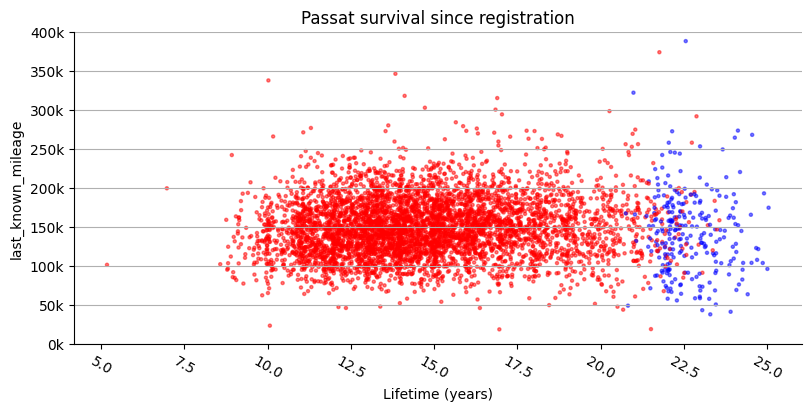

In [20]:
from simpler_mpl import set_common_mpl_styles, set_commas
import matplotlib.pyplot as plt

fig, ax = plt.subplots(constrained_layout=True)

passats_df.dropna().plot.scatter(
    figsize=(8, 4),
    x="lifetime",
    y="last_known_mileage",
    marker=".",
    alpha=0.5,
    # s=0.5,
    c="surviving_colour",
    ax=ax
)
#ax.set_xlim(5, 26)
ax.set_ylim(0, 400000)
#ax.plot(result["test_date"], result["passed"])  # , marker='o')
ax.yaxis.set_major_formatter(lambda x, pos: f"{int(x/1000):,}k")
plt.xticks(rotation=-30)
set_common_mpl_styles(
    ax, title="Passat survival since registration", ymin=0, xlabel="Lifetime (years)" #ylabel="Passing Tests per Week"
)
